Question 1:

Let's start with importing the necessary libraries: NumPy, SciPy and Matplotlib!


In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Now, starting with seeding the data for reproducibility alognside mean and standard deviation values for experiments 1 and 2

In [ ]:
# Simulating data for two experiments
np.random.seed(0)  # For reproducibility
experiment_1 = np.random.normal(loc=1.0, scale=0.2, size=20)  # Experiment 1: Mean = 1.0, SD = 0.2
experiment_2 = np.random.normal(loc=1.2, scale=0.25, size=20)  # Experiment 2: Mean = 1.2, SD = 0.25

With the associated means and standard deviations for the experiments, we can now plot a histogram and boxplot of simulated absorbances. The histogram outputs a graph that superimposes experiment 1 data on experiment 2. Further, the histogram visualizes the plot between absorbances (*x*) and frequency (*y*).

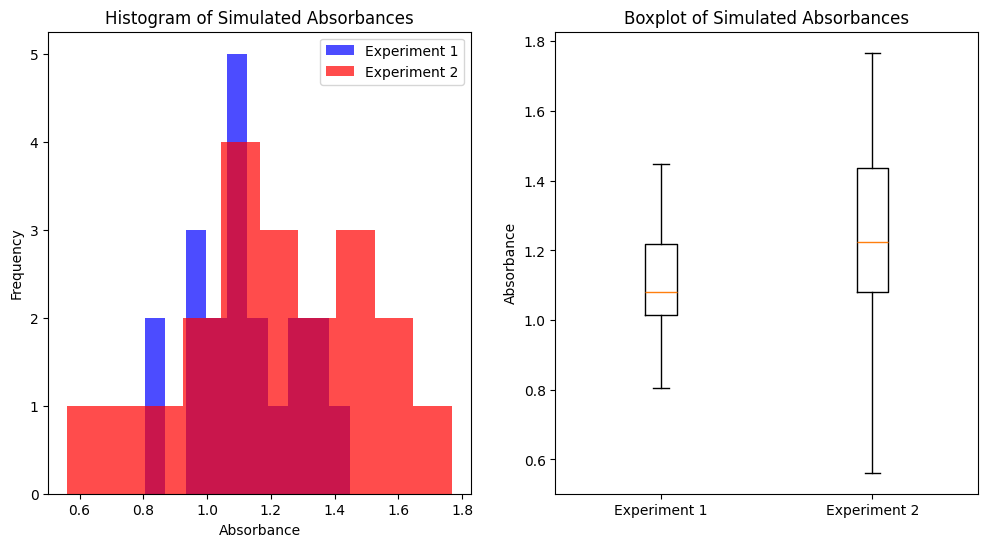

In [15]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(experiment_1, bins=10, color='blue', alpha=0.7, label='Experiment 1')
plt.hist(experiment_2, bins=10, color='red', alpha=0.7, label='Experiment 2')
plt.title('Histogram of Simulated Absorbances')
plt.xlabel('Absorbance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([experiment_1, experiment_2], labels=['Experiment 1', 'Experiment 2'])
plt.title('Boxplot of Simulated Absorbances')
plt.ylabel('Absorbance')
plt.show()

Now, we can leverage the functionalities of the *SciPy* library. To begin, we must leverage the normality test to orientate the experiment 1 and 2 data in a normal distribuition format. Next, we can test the variances of the two groups, which should be similar. If the data sourced from experiment 1 and 2 violate the previously stated assumption, we can consider using a non-parametric alternative to find the P-value. In this code snippet, the alternative of choice is the Mann-Whitney U Test. However, if the assumptions are met, we may use the T-test instead.

In [14]:
# Shapiro-Wilk test for normality
normality_test_1 = stats.shapiro(experiment_1)
normality_test_2 = stats.shapiro(experiment_2)
print(f"Shapiro-Wilk Test - Experiment 1: {normality_test_1}")
print(f"Shapiro-Wilk Test - Experiment 2: {normality_test_2}")

# Levene's test for equal variances
variance_test = stats.levene(experiment_1, experiment_2)
print(f"Levene's Test for Equal Variances: {variance_test}")

# Choosing the appropriate test based on Shapiro-Wilk and Levene's results
if normality_test_1.pvalue > 0.05 and normality_test_2.pvalue > 0.05 and variance_test.pvalue > 0.05:
    # Perform a t-test
    t_test_result = stats.ttest_ind(experiment_1, experiment_2, equal_var=True)
    print(f"T-test Result: {t_test_result}")
else:
    # Perform a Mann-Whitney U test
    mannwhitney_result = stats.mannwhitneyu(experiment_1, experiment_2, alternative='two-sided')
    print(f"Mann-Whitney U Test Result: {mannwhitney_result}")


Shapiro-Wilk Test - Experiment 1: ShapiroResult(statistic=0.9680666491257464, pvalue=0.7136380887419435)
Shapiro-Wilk Test - Experiment 2: ShapiroResult(statistic=0.9817650758138526, pvalue=0.9547966596885771)
Levene's Test for Equal Variances: LeveneResult(statistic=4.184343416044304, pvalue=0.047767009663744295)
Mann-Whitney U Test Result: MannwhitneyuResult(statistic=142.0, pvalue=0.11985556595924766)


Question 2:

Let's start (once again) with importing the necessary libraries: NumPy and Matplotlib!

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
particle_size = np.array([63.82226, 71.4442, 74.78978, 77.03388, 84.4384, 88.55918, 72.14541, 99.15352, 102.6502, 107.7106,
                          113.628, 117.4076, 122.3761, 125.4994, 131.3897, 135.1808, 119.9073, 146.7856, 151.0319, 156.8916])
concentration = np.array([1, 1.473684, 1.947368, 2.42105, 2.894737, 3.368421, 3.842105, 4.315789, 4.789474, 5.263158,
                          5.736842, 6.210526, 6.684211, 7.157895, 7.631579, 8.105263, 8.578947, 9.052632, 9.526316, 10])

Now, with the processed data we can define a function that will calculate the linear regression coefficients (mean of RV x and y, b0 and b1). This function, called *coeff_estimation* will take np.array inputs x (*particle_size*) and y (*concentration*) and then output b0 and b1, which are useful insights when calculating linear regression.

In [ ]:
# Function to estimate coefficients
def coeff_estimation(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

Next, we can create a function called plot_regression_line that will take np.array inputs x (*particle_size*) and y (*concentration*) alongside b. The linear regression coefficient (b) is stored as an array and called using b[i] where i = 0,1. Furthermore, the function will also calculate the linear regression line alongside the coefficient of correlation (R^2). While leveraging the Matplotlib library and core functionalities, we can plot the regression line at last!

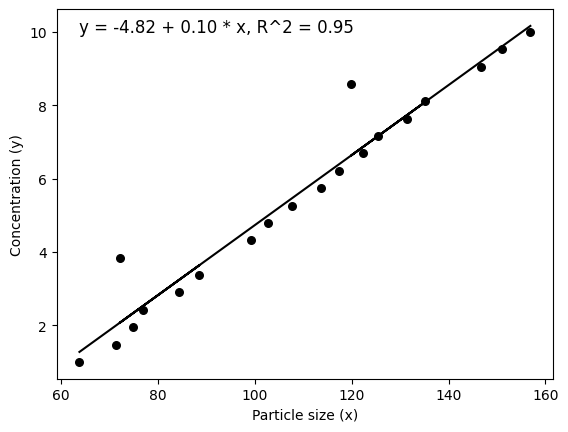

In [12]:


# Function to plot regression line
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="black", marker="o", s=30)

    # predicted response vector
    y_pred = b[0] + b[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="black")

    # putting labels
    plt.xlabel('Particle size (x)')
    plt.ylabel('Concentration (y)')

    equation_text = f'y = {b[0]:.2f} + {b[1]:.2f} * x'
    r_squared = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    equation_text += f', R^2 = {r_squared:.2f}'
    plt.text(np.min(particle_size), np.max(concentration), equation_text, fontsize=12, color='black')

    # showing plot
    plt.show()

# Estimate the coefficients
b = coeff_estimation(particle_size, concentration)

# Plot regression line
plot_regression_line(particle_size, concentration, b)


As we can see, the regression line has an equation y = -4.82 + 0.1*x*, while boasting a strong correlation, given an R^2 value of 0.95, indicating minimal deviation from the trendline.